# Task 3: Prediction using Unsupervised ML
## From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

# Name: Himanshu Bisht

# K-means clustering

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading and observing the dataset

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Since this is unsupervised ML, we remove the output labels from the dataset

In [5]:
iris_df = iris.iloc[:,:-1]
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


# Optimum Number of Clusters

In [6]:
X = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

# Now plotting results in a graph
The elbow-like curve will reveal the optimum number of clusters

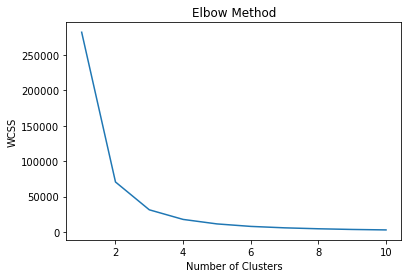

In [7]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster of sum squares
plt.show()

# Applying k-means to given dataset to confirm our findings
The curve suggests k=2,3,4. Let us take k=3

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter=300, n_init=10, random_state = 5)
Y_kmeans = kmeans.fit_predict(X)

# Now we scatter the data points according to their clusters

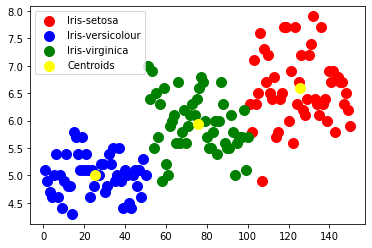

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# It is observed that k=3 is the optimum value for clustering the dataset